Import libraries/dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 86s 1us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

Visualize data

[9]


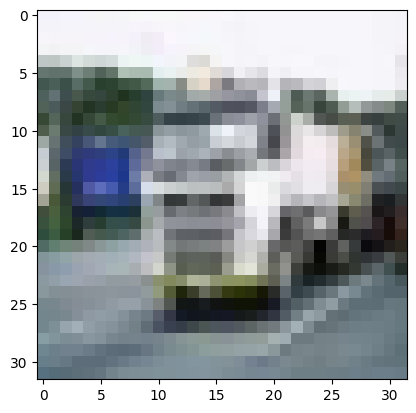

In [9]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

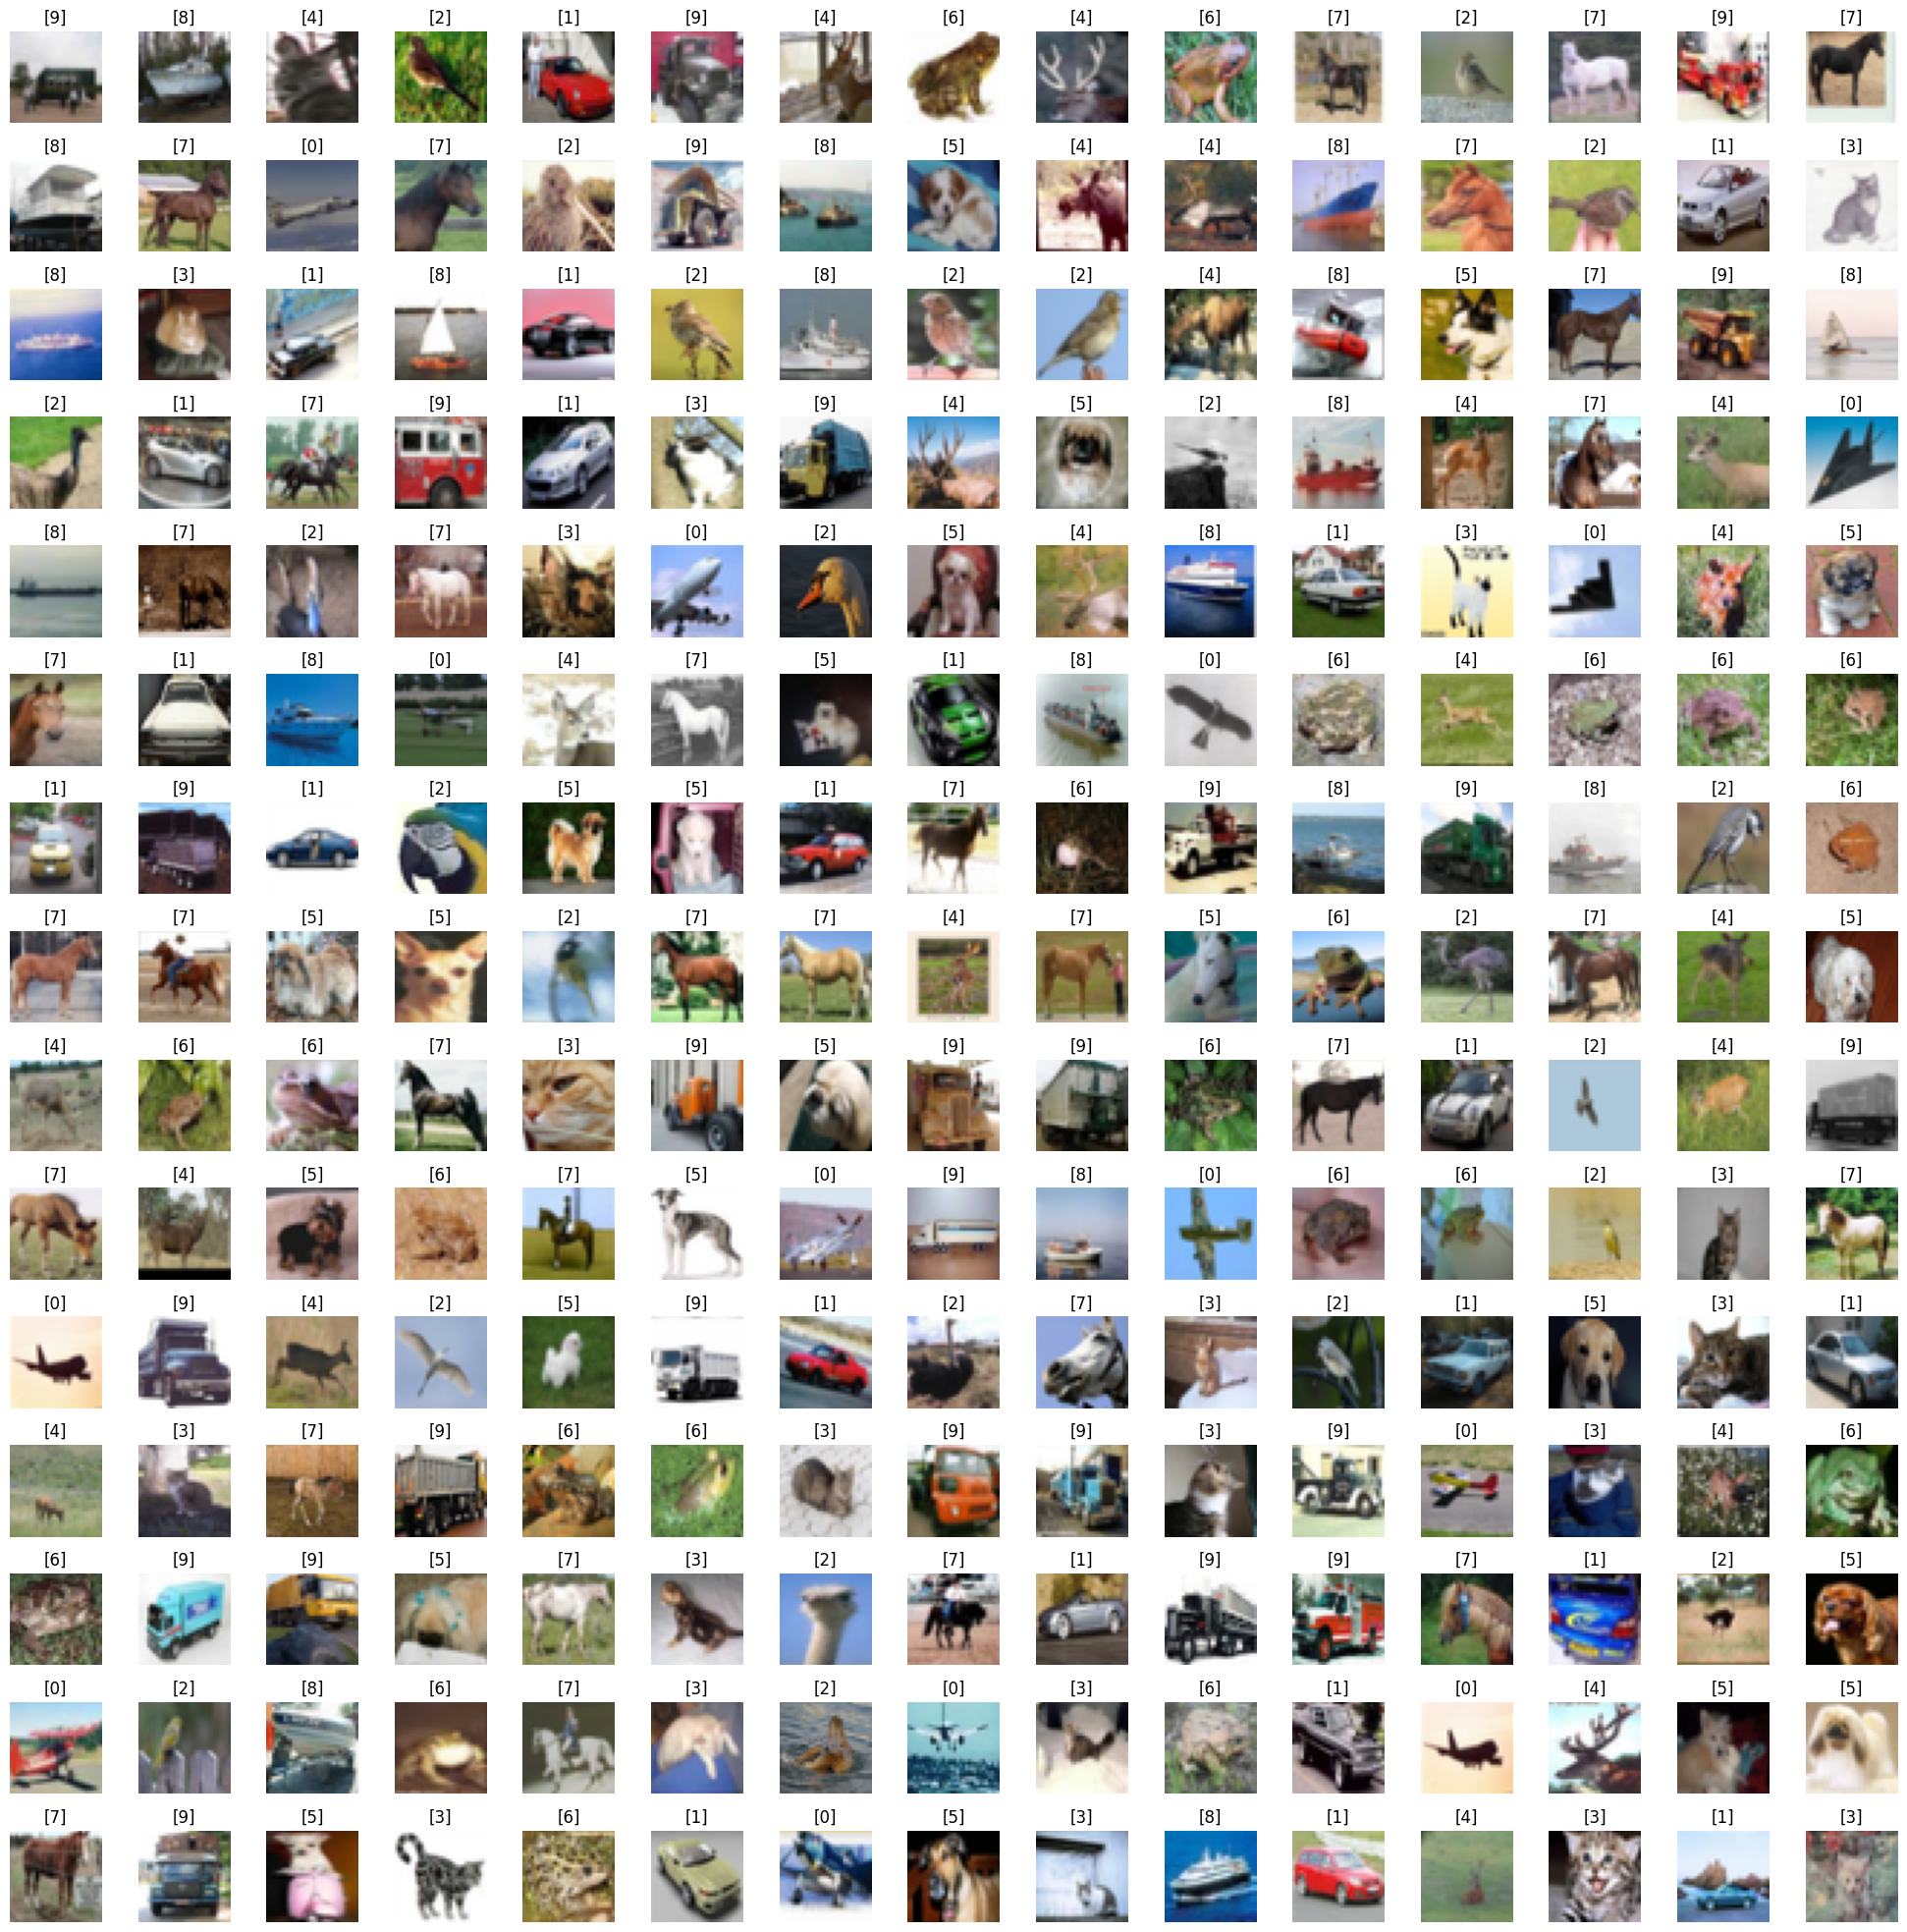

In [16]:
W_grid =15
L_grid =15

fig,axes= plt.subplots(L_grid,W_grid,figsize =(25,25))
axes =axes.ravel()

n_training =len(X_train)

for i in np.arange(0,L_grid *W_grid):
    index =np.random.randint(0, n_training) #pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace =0.4)

In [12]:
n_training 

50000

Data preparation

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
number_cat =10

In [19]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [20]:
import keras 
y_train =keras.utils.to_categorical(y_train, number_cat)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(50000, 10))

In [23]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(10000, 10))

In [25]:
X_train = X_train/255
X_test = X_test/255

In [27]:
Input_shape = X_train.shape[1:]

In [28]:
Input_shape

(32, 32, 3)

Train the model

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten ,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [34]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters =32, kernel_size =(3,3),activation ='relu',input_shape = Input_shape ))
cnn_model.add(Conv2D(filters =32, kernel_size =(3,3),activation ='relu' ))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters =64, kernel_size =(3,3),activation ='relu'))
cnn_model.add(Conv2D(filters =64, kernel_size =(3,3),activation ='relu' ))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512,activation ='relu'))
cnn_model.add(Dense(units=512,activation ='relu'))
cnn_model.add(Dense(units =10,activation ='softmax'))

In [44]:

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [48]:
history = cnn_model.fit(X_train,y_train,batch_size =32,epochs = 2,shuffle =True )

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.4182 - loss: 1.6057
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.5892 - loss: 1.1657


Evaluvate the model